1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:
    * small decision tree;
    * deep decision tree;
    * random forest on small trees;
    * random forest on deep trees;
2. Calculate the following metrics to check the quality of your models:
    * precision;
    * recall;
    * accuracy;
    * F1-score;
    * log-loss;
3. Plot precision-recall and ROC curves for your models.
4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd


from sklearn import metrics

### Load dataset

In [2]:
dataset = pd.read_csv('./bioresponse.csv')
dataset.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


Data seems to be normalized and cleaned, so we can jump straight to training


In [3]:
train_dataset, test_dataset = train_test_split(dataset, train_size=0.75, random_state=2310)
train_Y = train_dataset["Activity"]
del train_dataset["Activity"]
train_X = train_dataset

test_Y = test_dataset["Activity"]
del test_dataset["Activity"]
test_X = test_dataset

### Define function for collecting metrics (step 2)

In [4]:
def collect_metrics(prediction, probab, y):
    
    print(f"""
precision: {metrics.precision_score(y,prediction)}
recall: {metrics.recall_score(y, prediction)}
accuracy: {metrics.accuracy_score(y, prediction)}
f1: {metrics.f1_score(y,prediction)}
log-loss: {metrics.log_loss(y,prediction)}
          """)

    precision, recall, th_ = metrics.precision_recall_curve(y, probab)
    false_p, true_p, thr_ = metrics.roc_curve(y, probab)

    fig = plt.figure()
    ax = plt.axes()

    ax.plot(th_, precision[:-1], label="precision")
    ax.plot(th_, recall[:-1], label="recall")
    ax.set_xlabel('thresh')
    ax.set_title('precision-recall')
    ax.legend()
    ax.grid()

    fig = plt.figure()
    ax = plt.axes()

    ax.plot(false_p, true_p)
    ax.set_xlabel('false positives rate')
    ax.set_ylabel('true positives rate')
    ax.set_title('ROC')
    ax.grid()

### Small decision tree


precision: 0.758
recall: 0.751984126984127
accuracy: 0.7377398720682303
f1: 0.7549800796812749
log-loss: 9.058247062299662
          


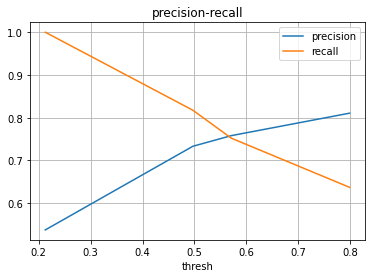

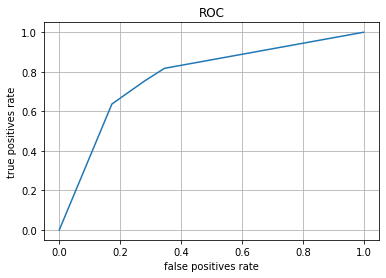

In [5]:
tree_small = DecisionTreeClassifier(max_depth=2, random_state=1)
tree_small = tree_small.fit(train_X, train_Y)

collect_metrics(tree_small.predict(test_X), tree_small.predict_proba(test_X)[:,1], test_Y)

### Deep decision tree


precision: 0.7551440329218106
recall: 0.7281746031746031
accuracy: 0.7270788912579957
f1: 0.7414141414141414
log-loss: 9.426462589756213
          


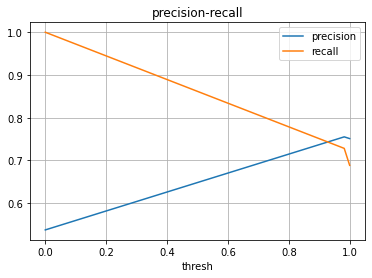

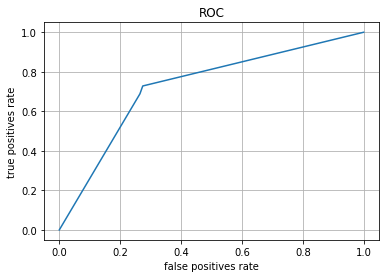

In [6]:
tree_big = DecisionTreeClassifier(max_depth=27, random_state=1)
tree_big = tree_big.fit(train_X, train_Y)

collect_metrics(tree_big.predict(test_X), tree_big.predict_proba(test_X)[:,1], test_Y)

### Random forest on small tree


precision: 0.689119170984456
recall: 0.7916666666666666
accuracy: 0.6961620469083155
f1: 0.7368421052631579
log-loss: 10.494344562992515
          


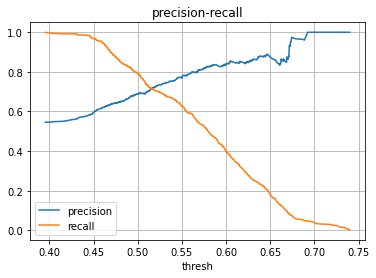

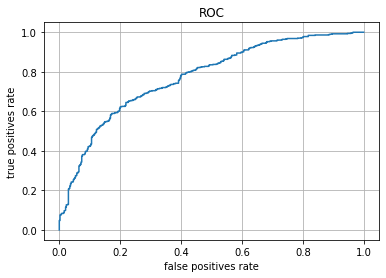

In [7]:
tree_small = RandomForestClassifier(max_depth=2, random_state=1)
tree_small = tree_small.fit(train_X, train_Y)

collect_metrics(tree_small.predict(test_X), tree_small.predict_proba(test_X)[:,1], test_Y)

### Random forest on big tree


precision: 0.8277310924369747
recall: 0.7817460317460317
accuracy: 0.7953091684434968
f1: 0.8040816326530611
log-loss: 7.069840762059837
          


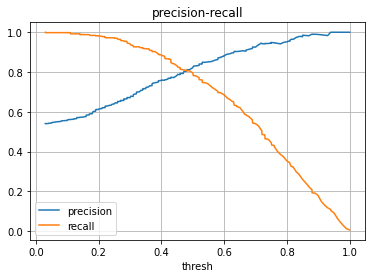

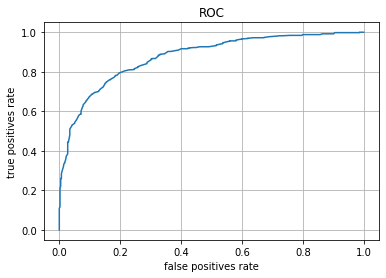

In [8]:
tree_big = RandomForestClassifier(max_depth=27, random_state=1)
tree_big = tree_big.fit(train_X, train_Y)

collect_metrics(tree_big.predict(test_X), tree_big.predict_proba(test_X)[:,1], test_Y)

### Classifier who avoids Type II (False Negative) errors
#### Step 4

Several classifiers from sklearn module were compared to see which gives high recall thus avoiding False Negative errors (Type II).

The best method was Gaussian Naive Bayes with recall of 0.918. This lead to relatively small precision and accuracy which is expected.


precision: 0.5868187579214195
recall: 0.9186507936507936
accuracy: 0.6087420042643923
f1: 0.7161639597834494
log-loss: 13.51385032590028
          


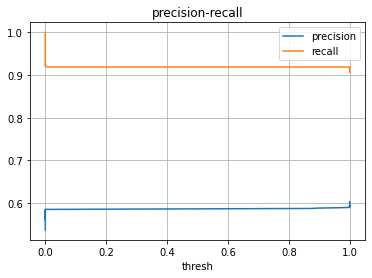

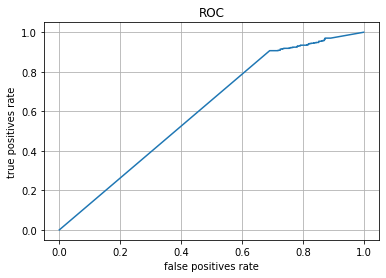

In [9]:
from sklearn.naive_bayes import GaussianNB


gauss_nb = GaussianNB()
gauss_nb = gauss_nb.fit(train_X, train_Y)

collect_metrics(gauss_nb.predict(test_X), gauss_nb.predict_proba(test_X)[:,1], test_Y)